In [ ]:
pip install pycryptodome

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 15.9 MB/s eta 0:00:00


In [ ]:
from Crypto.Cipher import DES
import binascii

def pad(text):
    """Ensures the text is a multiple of 8 bytes by padding with spaces."""
    while len(text) % 8 != 0:
        text += ' '
    return text

def des_encrypt(plain_text, key):
    """Encrypts the given plain_text using DES with the given key."""
    cipher = DES.new(key, DES.MODE_ECB)  # ECB mode
    padded_text = pad(plain_text)
    encrypted_text = cipher.encrypt(padded_text.encode())
    return binascii.hexlify(encrypted_text).decode()

def des_decrypt(encrypted_text, key):
    """Decrypts the given encrypted_text using DES with the given key."""
    cipher = DES.new(key, DES.MODE_ECB)  # ECB mode
    decrypted_text = cipher.decrypt(binascii.unhexlify(encrypted_text))
    return decrypted_text.decode().strip()

# Example Usage
key = b'8charKey'  # DES key must be 8 bytes long
plain_text = "HelloDES"
print("Text: ",plain_text)

encrypted = des_encrypt(plain_text, key)
print(f"Encrypted: {encrypted}")

decrypted = des_decrypt(encrypted, key)
print(f"Decrypted: {decrypted}")


Text:  HelloDES
Encrypted: c4ff165fb410d0a2
Decrypted: HelloDES


In [ ]:
# Tables for DES (Initial Permutation, Expansion, S-Boxes, etc.)
IP = [
    58, 50, 42, 34, 26, 18, 10, 2,
    60, 52, 44, 36, 28, 20, 12, 4,
    62, 54, 46, 38, 30, 22, 14, 6,
    64, 56, 48, 40, 32, 24, 16, 8,
    57, 49, 41, 33, 25, 17, 9, 1,
    59, 51, 43, 35, 27, 19, 11, 3,
    61, 53, 45, 37, 29, 21, 13, 5,
    63, 55, 47, 39, 31, 23, 15, 7
]

FP = [
    40, 8, 48, 16, 56, 24, 64, 32,
    39, 7, 47, 15, 55, 23, 63, 31,
    38, 6, 46, 14, 54, 22, 62, 30,
    37, 5, 45, 13, 53, 21, 61, 29,
    36, 4, 44, 12, 52, 20, 60, 28,
    35, 3, 43, 11, 51, 19, 59, 27,
    34, 2, 42, 10, 50, 18, 58, 26,
    33, 1, 41, 9, 49, 17, 57, 25
]

E = [
    32, 1, 2, 3, 4, 5, 4, 5, 6, 7, 8, 9,
    8, 9, 10, 11, 12, 13, 12, 13, 14, 15, 16, 17,
    16, 17, 18, 19, 20, 21, 20, 21, 22, 23, 24, 25,
    24, 25, 26, 27, 28, 29, 28, 29, 30, 31, 32, 1
]

P = [
    16, 7, 20, 21, 29, 12, 28, 17,
    1, 15, 23, 26, 5, 18, 31, 10,
    2, 8, 24, 14, 32, 27, 3, 9,
    19, 13, 30, 6, 22, 11, 4, 25
]

# Convert a string to binary (64-bit padding)
def string_to_bin(text):
    binary = ''.join(format(ord(char), '08b') for char in text)
    return binary.ljust(64, '0')[:64]  # Ensure 64 bits

# Convert binary to string with error handling
def bin_to_string(binary):
    chars = [binary[i:i+8] for i in range(0, len(binary), 8)]
    try:
        return ''.join(chr(int(char, 2)) for char in chars if char.isdigit())
    except ValueError:
        return "Error in conversion"

# XOR two bit strings
def xor(bin1, bin2):
    return ''.join('1' if b1 != b2 else '0' for b1, b2 in zip(bin1, bin2))

# The Feistel function (simplified)
def feistel(right, subkey):
    expanded = permute(right, E)
    xored = xor(expanded, subkey)
    return permute(xored[:32], P)  # Permutation (mock S-box for simplicity)

# Permutation function
def permute(block, table):
    return ''.join(block[i - 1] for i in table)

# DES Encryption
def des_encrypt(plain_text, key):
    bin_text = string_to_bin(plain_text)
    bin_key = string_to_bin(key)

    permuted_text = permute(bin_text, IP)
    L, R = permuted_text[:32], permuted_text[32:]

    for i in range(16):
        new_R = xor(L, feistel(R, bin_key))
        L, R = R, new_R

    final_block = permute(R + L, FP)
    return bin_to_string(final_block)

# DES Decryption
def des_decrypt(cipher_text, key):
    return des_encrypt(cipher_text, key)

# Example
key = "8CharKey"
plain_text = "HelloDES"

encrypted = des_encrypt(plain_text, key)
print(f"Encrypted: {encrypted}")

decrypted = des_decrypt(encrypted, key)
print(f"Decrypted: {decrypted}")


Encrypted: ÂÅìýJl¦
Decrypted: HelloDES


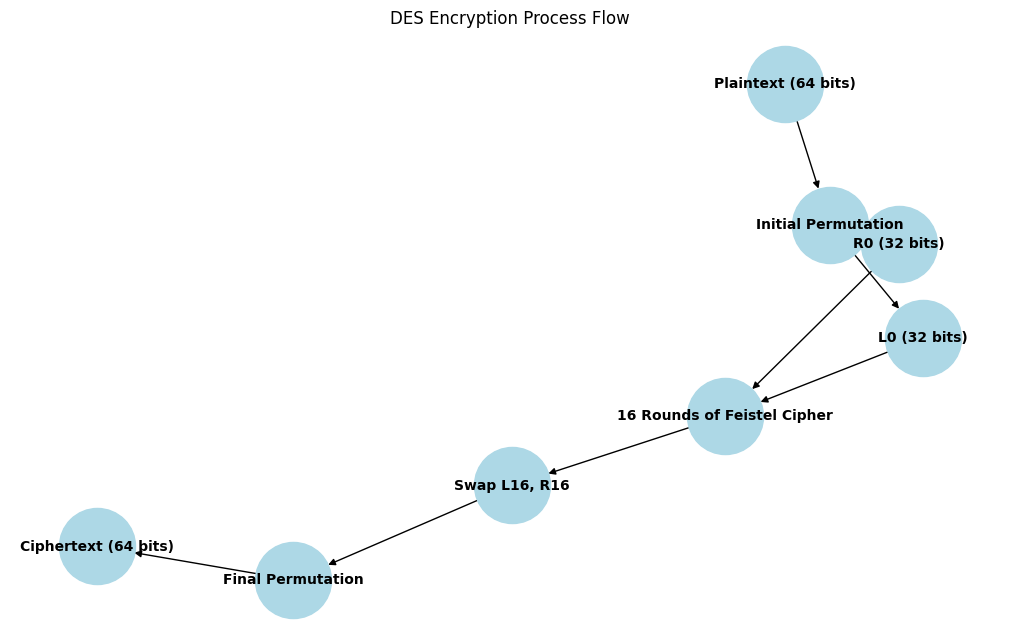

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to visualize DES encryption process
def visualize_des():
    G = nx.DiGraph()

    # Nodes
    nodes = [
        "Plaintext (64 bits)", "Initial Permutation",
        "L0 (32 bits)", "R0 (32 bits)",
        "16 Rounds of Feistel Cipher",
        "Swap L16, R16", "Final Permutation", "Ciphertext (64 bits)"
    ]

    for node in nodes:
        G.add_node(node)

    # Edges (Flow)
    edges = [
        ("Plaintext (64 bits)", "Initial Permutation"),
        ("Initial Permutation", "L0 (32 bits)"),
        ("Initial Permutation", "R0 (32 bits)"),
        ("L0 (32 bits)", "16 Rounds of Feistel Cipher"),
        ("R0 (32 bits)", "16 Rounds of Feistel Cipher"),
        ("16 Rounds of Feistel Cipher", "Swap L16, R16"),
        ("Swap L16, R16", "Final Permutation"),
        ("Final Permutation", "Ciphertext (64 bits)")
    ]

    for edge in edges:
        G.add_edge(*edge)

    # Draw graph
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='black', node_size=3000, font_size=10, font_weight='bold')
    plt.title("DES - Encryption Process Flow")
    plt.show()

# Run visualization
visualize_des()



--- Step 1: Convert to Binary ---
Plaintext in Binary : 0100100001100101011011000110110001101111010001000100010101010011
Key in Binary       : 0011100001000011011010000110000101110010010010110110010101111001

--- Step 2: Initial Permutation ---
After Initial Permutation: 1111111110000000011111101101001000000000000111100001110110010000
L0: 11111111100000000111111011010010
R0: 00000000000111100001110110010000

--- Step 3: Round 1 ---
Expanded R0 : 000000000000000011111100000011111011110010100000
XOR with Key     : 001110000100001110010100011011101100111011101011
New R1 (XOR L0) : 11000111110000111110101010111100

--- Step 3: Round 2 ---
Expanded R1 : 011000001111111000000111111101010101010111111001
XOR with Key     : 010110001011110101101111100101000010011110110010
New R2 (XOR L1) : 01011000101000110111001000000100

--- Step 4: Swap & Final Permutation ---
Final Ciphertext (Binary) : 1011000010111100100000110100101001000110000111101110110010111010


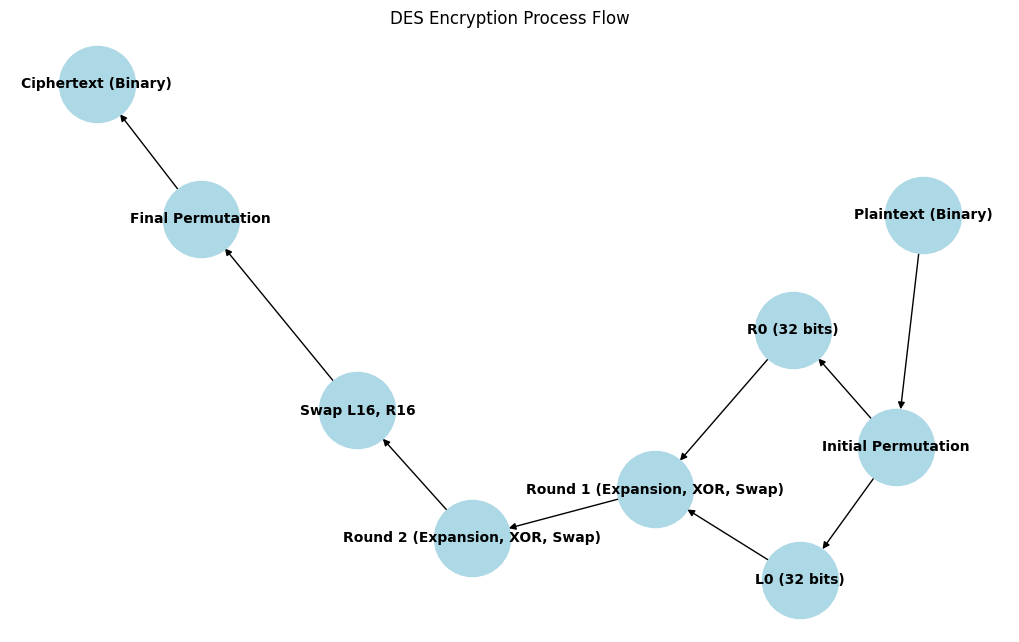

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Initial Permutation Table
IP = [
    58, 50, 42, 34, 26, 18, 10, 2,
    60, 52, 44, 36, 28, 20, 12, 4,
    62, 54, 46, 38, 30, 22, 14, 6,
    64, 56, 48, 40, 32, 24, 16, 8,
    57, 49, 41, 33, 25, 17, 9, 1,
    59, 51, 43, 35, 27, 19, 11, 3,
    61, 53, 45, 37, 29, 21, 13, 5,
    63, 55, 47, 39, 31, 23, 15, 7
]

# Expansion Table
E = [
    32, 1, 2, 3, 4, 5, 4, 5, 6, 7, 8, 9,
    8, 9, 10, 11, 12, 13, 12, 13, 14, 15, 16, 17,
    16, 17, 18, 19, 20, 21, 20, 21, 22, 23, 24, 25,
    24, 25, 26, 27, 28, 29, 28, 29, 30, 31, 32, 1
]

# Final Permutation Table
FP = [
    40, 8, 48, 16, 56, 24, 64, 32,
    39, 7, 47, 15, 55, 23, 63, 31,
    38, 6, 46, 14, 54, 22, 62, 30,
    37, 5, 45, 13, 53, 21, 61, 29,
    36, 4, 44, 12, 52, 20, 60, 28,
    35, 3, 43, 11, 51, 19, 59, 27,
    34, 2, 42, 10, 50, 18, 58, 26,
    33, 1, 41, 9, 49, 17, 57, 25
]

# Convert string to binary
def string_to_bin(text):
    return ''.join(format(ord(char), '08b') for char in text).ljust(64, '0')[:64]

# Permutation function
def permute(block, table):
    return ''.join(block[i - 1] for i in table)

# XOR function
def xor(bin1, bin2):
    return ''.join('1' if b1 != b2 else '0' for b1, b2 in zip(bin1, bin2))

# Visualizing DES Steps
def visualize_des_steps(plain_text, key):
    print("\n--- Step 1: Convert to Binary ---")
    bin_text = string_to_bin(plain_text)
    bin_key = string_to_bin(key)
    print(f"Plaintext in Binary : {bin_text}")
    print(f"Key in Binary       : {bin_key}")

    print("\n--- Step 2: Initial Permutation ---")
    permuted_text = permute(bin_text, IP)
    print(f"After Initial Permutation: {permuted_text}")

    L, R = permuted_text[:32], permuted_text[32:]
    print(f"L0: {L}")
    print(f"R0: {R}")

    for i in range(1, 3):  # Showing only 2 rounds for clarity
        print(f"\n--- Step 3: Round {i} ---")
        expanded_R = permute(R, E)
        print(f"Expanded R{i-1} : {expanded_R}")

        xored_R = xor(expanded_R, bin_key[:48])  # Mocking key schedule
        print(f"XOR with Key     : {xored_R}")

        new_R = xor(L, xored_R[:32])
        print(f"New R{i} (XOR L{i-1}) : {new_R}")

        L, R = R, new_R  # Swap

    print("\n--- Step 4: Swap & Final Permutation ---")
    final_block = permute(R + L, FP)
    print(f"Final Ciphertext (Binary) : {final_block}")

    visualize_process()

# Flowchart Visualization
def visualize_process():
    G = nx.DiGraph()
    steps = [
        "Plaintext (Binary)", "Initial Permutation",
        "L0 (32 bits)", "R0 (32 bits)",
        "Round 1 (Expansion, XOR, Swap)", "Round 2 (Expansion, XOR, Swap)",
        "Swap L16, R16", "Final Permutation", "Ciphertext (Binary)"
    ]

    for step in steps:
        G.add_node(step)

    edges = [
        ("Plaintext (Binary)", "Initial Permutation"),
        ("Initial Permutation", "L0 (32 bits)"),
        ("Initial Permutation", "R0 (32 bits)"),
        ("L0 (32 bits)", "Round 1 (Expansion, XOR, Swap)"),
        ("R0 (32 bits)", "Round 1 (Expansion, XOR, Swap)"),
        ("Round 1 (Expansion, XOR, Swap)", "Round 2 (Expansion, XOR, Swap)"),
        ("Round 2 (Expansion, XOR, Swap)", "Swap L16, R16"),
        ("Swap L16, R16", "Final Permutation"),
        ("Final Permutation", "Ciphertext (Binary)")
    ]

    for edge in edges:
        G.add_edge(*edge)

    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='black', node_size=3000, font_size=10, font_weight='bold')
    plt.title("DES Encryption Process Flow")
    plt.show()

# Example Run
visualize_des_steps("HelloDES", "8CharKey")


In [ ]:
!pip install bitarray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.5/301.5 kB 7.3 MB/s eta 0:00:00


Enter plaintext: hey jyoshika
Enter 8-char key: asdfzxcv


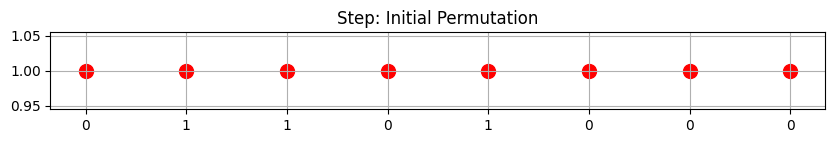

Round 1
Left  : 0010
Right : 1101
Round Key : 01100001



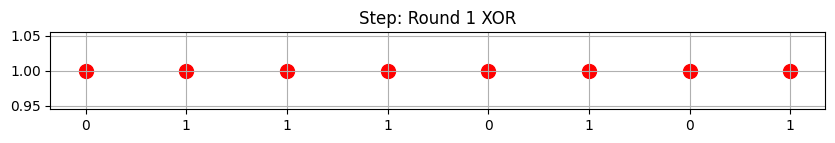

Round 2
Left  : 1101
Right : 1010
Round Key : 01100001



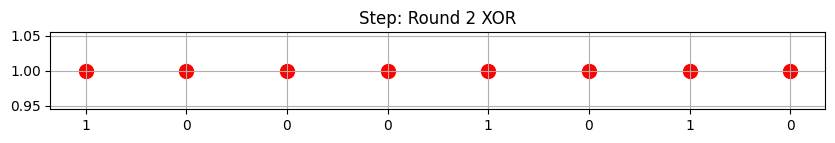

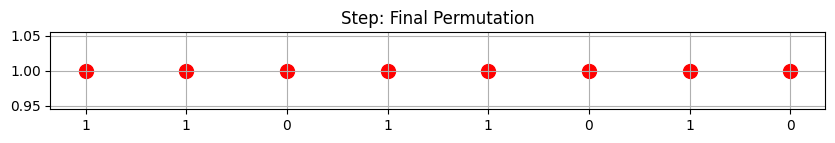

Encrypted Text: b'\xdc'


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from bitarray import bitarray
from bitarray.util import ba2int, int2ba

def permute(data, table):
    return bitarray([data[i - 1] for i in table])

def xor_bits(a, b):
    return bitarray([x ^ y for x, y in zip(a, b)])

def visualize_permutation(step, data, table):
    plt.figure(figsize=(10, 1))
    plt.title(f"Step: {step}")
    plt.xticks(range(len(data)), data.tolist())
    plt.scatter(range(len(table)), [1] * len(table), c='red', s=100)
    plt.grid()
    plt.show()

def visualize_process(step, left, right, round_key):
    print(f"{step}")
    print(f"Left  : {left.to01()}")
    print(f"Right : {right.to01()}")
    print(f"Round Key : {round_key.to01()}\n")

def pad_text(text, size=8):
    while len(text) % size != 0:
        text += ' '
    return text

def des_encrypt(plaintext, key):
    plaintext = pad_text(plaintext)

    plaintext_bits = bitarray()
    plaintext_bits.frombytes(plaintext[:8].encode('utf-8'))

    key_bits = bitarray()
    key_bits.frombytes(key.encode('utf-8'))

    initial_permutation_table = [2, 6, 3, 1, 4, 8, 5, 7]
    permuted_text = permute(plaintext_bits, initial_permutation_table)

    visualize_permutation("Initial Permutation", plaintext_bits, initial_permutation_table)

    left_half, right_half = permuted_text[:4], permuted_text[4:]
    for round_num in range(2):
        expanded_right = permute(right_half, [4, 1, 2, 3, 2, 3, 4, 1])

        round_key = key_bits[:8]
        round_xor = xor_bits(expanded_right, round_key)

        left_half, right_half = right_half, xor_bits(left_half, round_xor)

        visualize_process(f"Round {round_num + 1}", left_half, right_half, round_key)
        visualize_permutation(f"Round {round_num + 1} XOR", round_xor, list(range(len(round_xor))))

    final_permutation_table = [4, 1, 3, 5, 7, 2, 8, 6]
    final_text = permute(left_half + right_half, final_permutation_table)

    visualize_permutation("Final Permutation", left_half + right_half, final_permutation_table)

    return final_text.tobytes()

plaintext = input("Enter plaintext: ")
key = input("Enter 8-char key: ")
encrypted = des_encrypt(plaintext, key)
print("Encrypted Text:", encrypted)